In [3]:
import sys

sys.path.append("../")

In [ ]:
from CRAFT.craft import CRAFT

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt

Detected 4 words
Detected word: 'HÃY NGĂN CHẶN' with confidence 0.79
Detected word: 'NAN BUÔN BÁN' with confidence 0.99
Detected word: 'PHỤ NỮ' with confidence 0.97
Detected word: 'VÀ TRẺ EM' with confidence 0.82


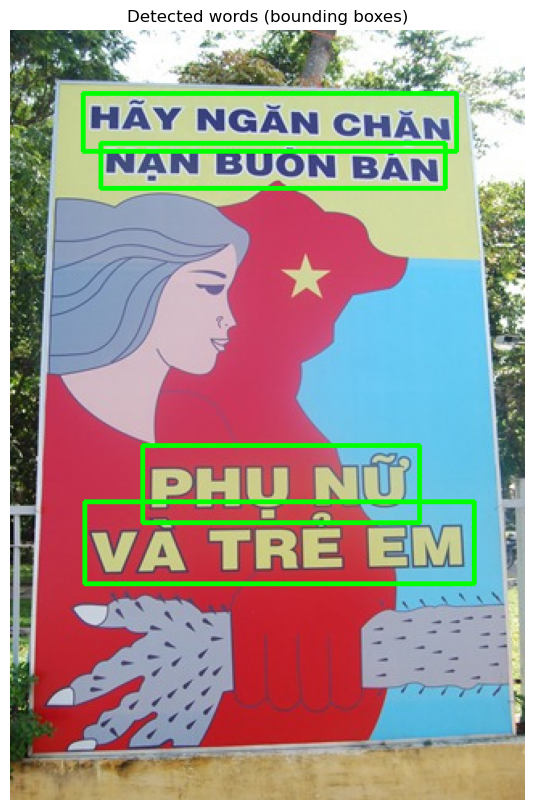

In [7]:
# Khởi tạo EasyOCR Reader, chỉ detect (recog=False)
reader = easyocr.Reader(['vi'])

# Đọc ảnh
image_path = '../data/vietnamese/train_images/im0004.jpg'
image = cv2.imread(image_path)

# Chuyển BGR sang RGB để hiển thị đúng màu (matplotlib dùng RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect text (paragraph=False để detect từng từ riêng lẻ)
results = reader.readtext(image, detail=1, paragraph=False)

print(f"Detected {len(results)} words")

# Kết quả trả về là list:
# [ (bbox, confidence), ... ]
# bbox: 4 điểm polygon dạng [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]

# Vẽ bounding box từng từ ra ảnh
for (bbox, text, prob) in results:
    print(f"Detected word: '{text}' with confidence {prob:.2f}")
    pts = bbox
    pts = pts + [pts[0]]  # close polygon
    pts = [[int(x), int(y)] for x, y in pts]
    for i in range(len(pts)-1):
        cv2.line(image_rgb, tuple(pts[i]), tuple(pts[i+1]), (0,255,0), 2)

plt.figure(figsize=(15,10))
plt.imshow(image_rgb)
plt.title("Detected words (bounding boxes)")
plt.axis('off')
plt.show()



In [1]:
from paddleocr import PaddleOCR
# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Load an image
img_path = '../data/vietnamese/test_images/im1201.jpg'
if not os.path.exists(img_path):
    print(f"Image not found: {img_path}")

# Perform OCR
result = ocr.ocr(img_path, cls=True)

# Print the results
for line in result:
    for word_info in line:
        print(f"Detected text: {word_info[1][0]}, Confidence: {word_info[1][1]}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\conda_envs\machine_learning\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\conda_envs\machine_learning\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\conda_envs\machine_learning\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\conda_envs\machine_learning\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\conda_envs

AttributeError: _ARRAY_API not found

ImportError: initialization failed

In [4]:
import paddle
print(paddle.__version__)

2.5.1
